Index

1. Objective
2. EDA (Exploratory Data Analysis)
3. Feature Engineering
4. Modeling
    1. Decision Tree
    2. Random Forest
    3. XGBoost
5. Conclusion

# 1. Objective

Predict Customer LTVs of an automobile insurance company. There are 24 types of data including customer LTV and I'd like to predict LTVs through the analysis of LTV (dependant varible) and other data (indepedent variables).

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 2. EDA (Exploratory Data Analysis)

In [2]:
# upload data
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
# view dataframe
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.tail()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [5]:
df.shape

(9134, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

There are 9134 rows and 24 columns.

The row starts at 0 and ends at 9133.

There are 16 kinds of categorical data and 8 kinds of continuous data.

There are no null values so no further action required to replace missing or null values.

Categorical data - Customer, State, Response, Coverage, Education, Effective To Date, EmploymentStatus, Gender, Location Code, Marital Status, Policy Type, Policy, Renew Offer Type, Sales Channel, Vehicle Class, Vehicle Size    

Continuous data - Customer Lifetime Value, Income, Monthly Premium Auto, Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies, Total Claim Amount.

In [7]:
# Unique values of each column
df.nunique()

Customer                         9134
State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

In [8]:
# Dataframe summary
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


**(1) Continuous Data Analysis**

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer Lifetime Value'>

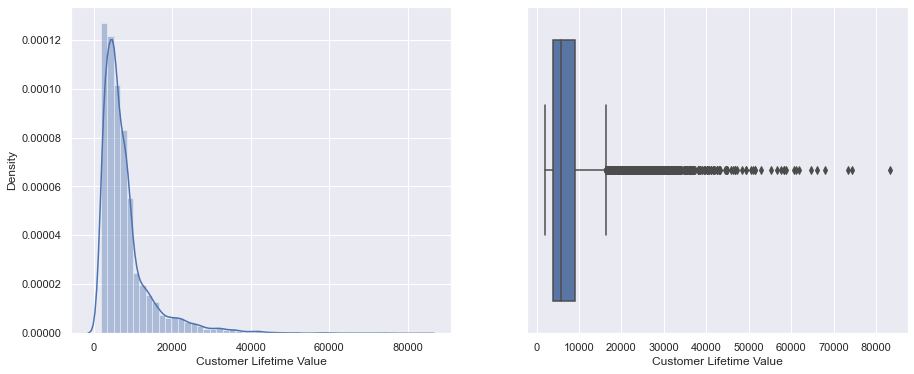

In [9]:
# Customer Lifetime Value 
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.distplot(df['Customer Lifetime Value'])

plt.subplot(1, 2, 2)
sns.boxplot(df['Customer Lifetime Value'])

In [10]:
# Identifying Outliers with Interquartile Range (IQR)
Q1 = df['Customer Lifetime Value'].quantile(0.25)
Q3 = df['Customer Lifetime Value'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Outliers
df[(df['Customer Lifetime Value'] > (Q3 + 1.5 * IQR))]['Customer Lifetime Value']

4967.915247000001


8       24127.50402
22      24127.50402
31      18975.45611
50      36707.42639
51      33473.34946
           ...     
9097    30104.51969
9110    34611.37896
9122    25464.82059
9125    19872.26200
9129    23405.98798
Name: Customer Lifetime Value, Length: 817, dtype: float64

Customer Lifetime Value has 817 outliers which go beyond upper fence (Q3 + 1.5 * IQR).

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Customer Lifetime Value'>

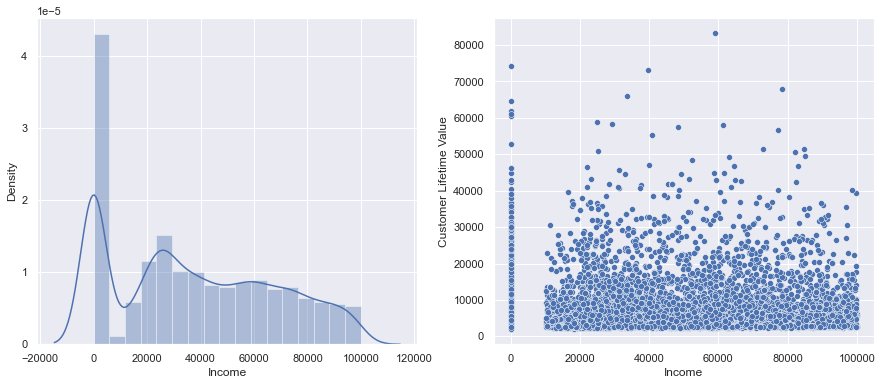

In [11]:
# Income 
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.distplot(df['Income'])

plt.subplot(1, 2, 2)
sns.scatterplot(x='Income', y='Customer Lifetime Value', data=df)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Customer Lifetime Value'>

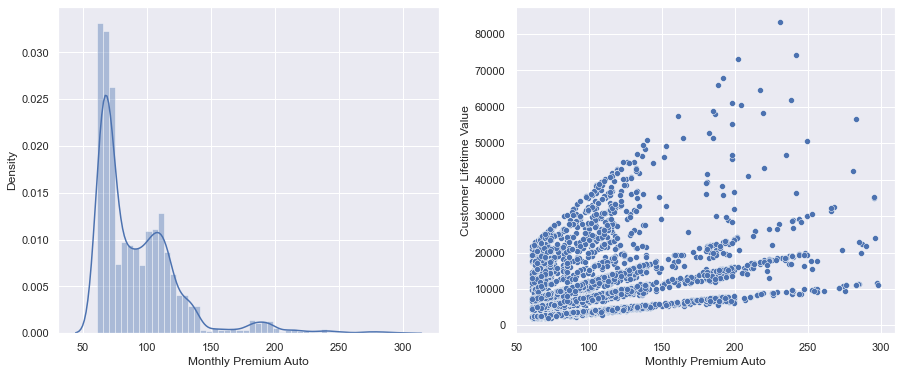

In [12]:
# Monthly Premium Auto
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.distplot(df['Monthly Premium Auto'])

plt.subplot(1, 2, 2)
sns.scatterplot(x='Monthly Premium Auto', y='Customer Lifetime Value', data=df)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Months Since Last Claim', ylabel='Customer Lifetime Value'>

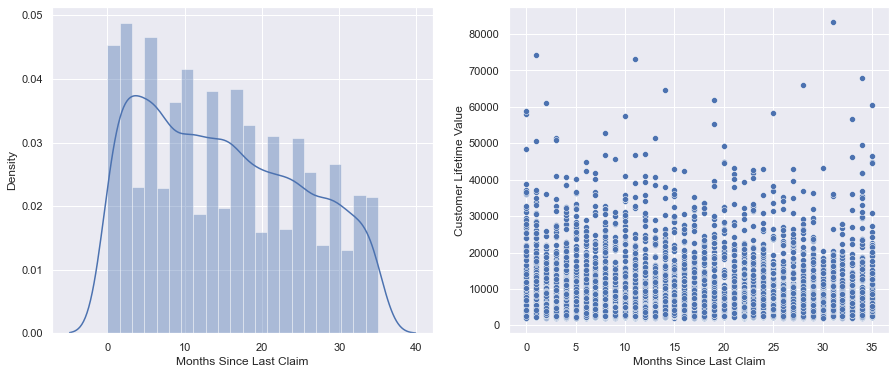

In [13]:
# Months Since Last Claim
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.distplot(df['Months Since Last Claim'])

plt.subplot(1, 2, 2)
sns.scatterplot(x='Months Since Last Claim', y='Customer Lifetime Value', data=df)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Customer Lifetime Value'>

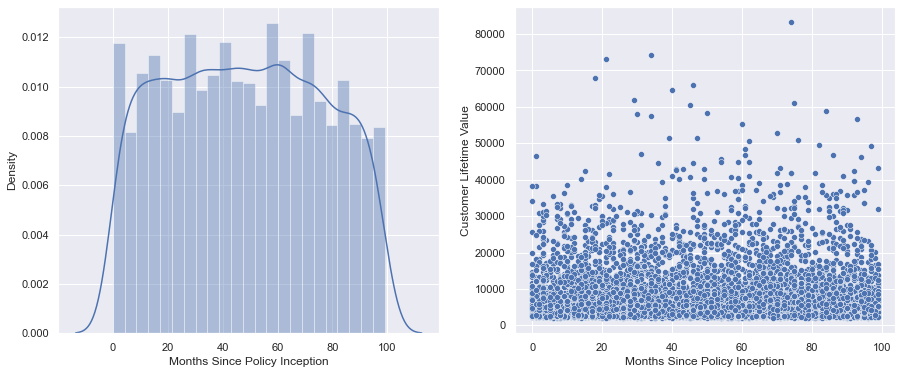

In [14]:
# Months Since Policy Inception
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.distplot(df['Months Since Policy Inception'])

plt.subplot(1, 2, 2)
sns.scatterplot(x='Months Since Policy Inception', y='Customer Lifetime Value', data=df)

In [15]:
# Number of Open Complaints
df['Number of Open Complaints'].unique()

array([0, 2, 1, 3, 5, 4], dtype=int64)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of Open Complaints', ylabel='Customer Lifetime Value'>

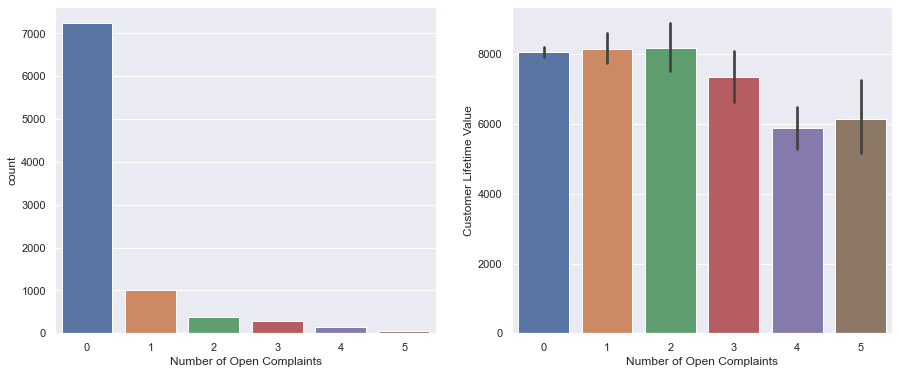

In [16]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(df['Number of Open Complaints'])

plt.subplot(1, 2, 2)
sns.barplot(x='Number of Open Complaints', y='Customer Lifetime Value', data=df)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of Policies', ylabel='Customer Lifetime Value'>

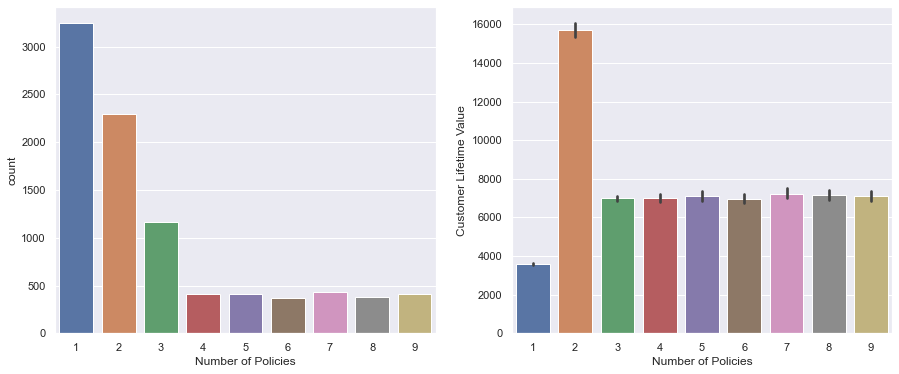

In [17]:
# Number of Policies
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(df['Number of Policies'])

plt.subplot(1, 2, 2)
sns.barplot(x='Number of Policies', y='Customer Lifetime Value', data=df)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Claim Amount', ylabel='Customer Lifetime Value'>

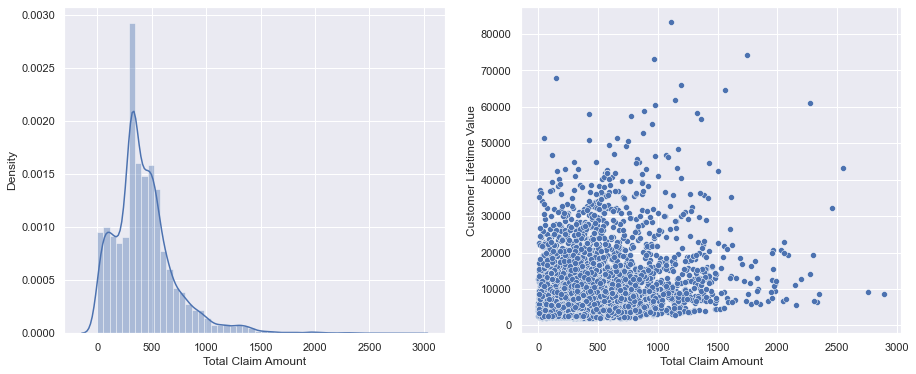

In [18]:
# Total Claim Amount
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.distplot(df['Total Claim Amount'])

plt.subplot(1, 2, 2)
sns.scatterplot(x='Total Claim Amount', y='Customer Lifetime Value', data=df)

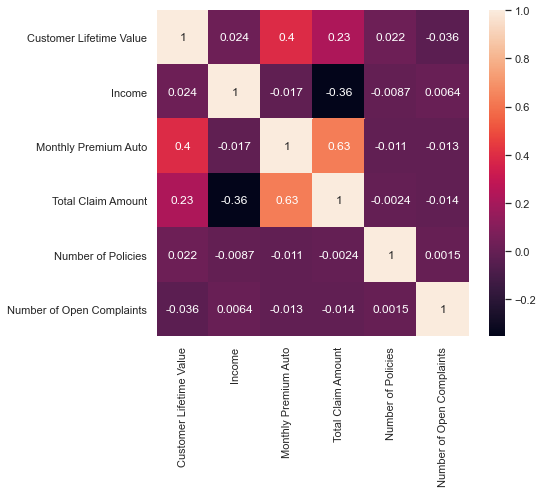

In [19]:
plt.figure(figsize=(7,6))
sns.heatmap(df[['Customer Lifetime Value','Income','Monthly Premium Auto','Total Claim Amount','Number of Policies','Number of Open Complaints']].corr(),annot = True)
plt.show()

Income, Months Since Last Clamin, Months Since Policy Inception and Number of Open complaints have no meaningful relationship with LTV. 

Monthly Premium Auto has a linear correlation with Customer LTV and Total Claim Amount seems to have some co-relationship with Customer LTV. 

LTV was the highest for two policies and lowest for one. The rest are all similar to LTV.

**(2) Categorical Data Analysis**

In [20]:
# Customer is an unique serial number of a custmer. So exclude from the analysis

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='Customer Lifetime Value'>

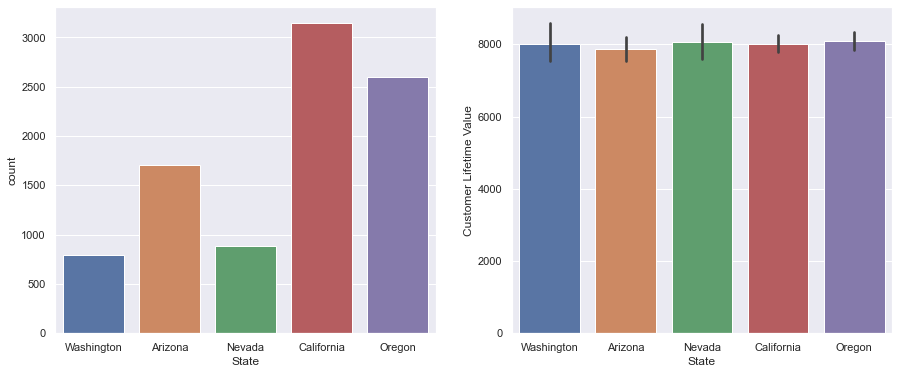

In [21]:
# State
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(df['State'])

plt.subplot(1, 2, 2)
sns.barplot(x='State', y='Customer Lifetime Value', data=df)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='Customer Lifetime Value'>

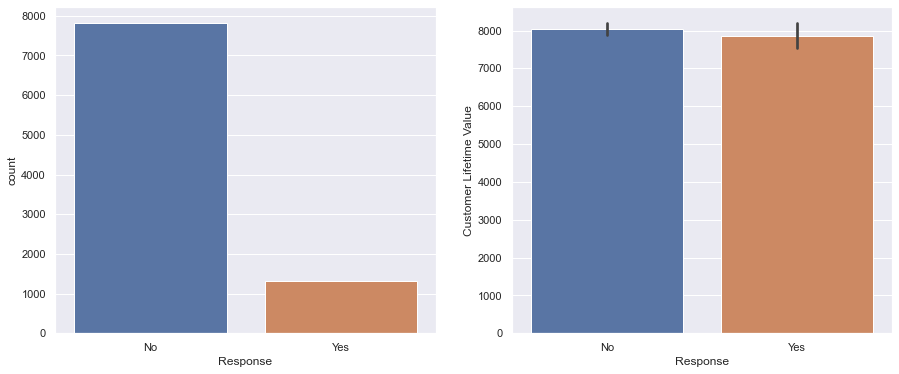

In [22]:
# Response
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(df['Response'])

plt.subplot(1, 2, 2)
sns.barplot(x='Response', y='Customer Lifetime Value', data=df)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Coverage', ylabel='Customer Lifetime Value'>

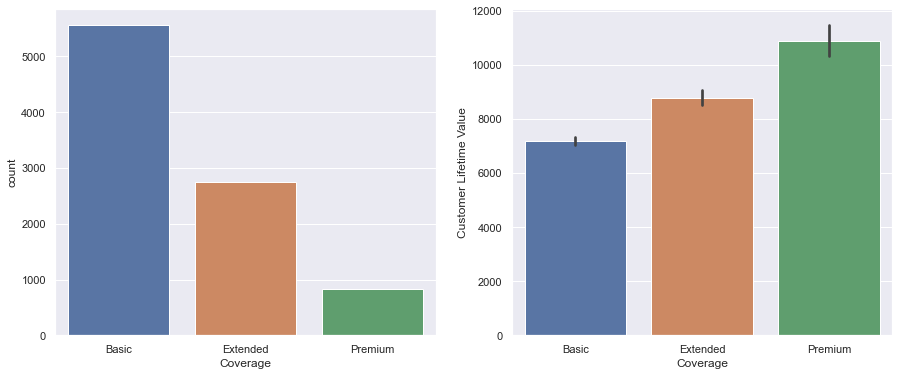

In [23]:
# Coverage
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(df['Coverage'])

plt.subplot(1, 2, 2)
sns.barplot(x='Coverage', y='Customer Lifetime Value', data=df)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='Customer Lifetime Value'>

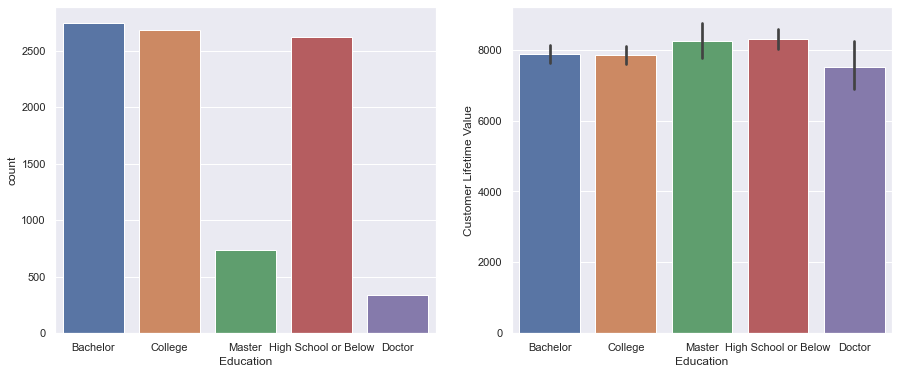

In [24]:
# Education
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(df['Education'])

plt.subplot(1, 2, 2)
sns.barplot(x='Education', y='Customer Lifetime Value', data=df)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EmploymentStatus', ylabel='Customer Lifetime Value'>

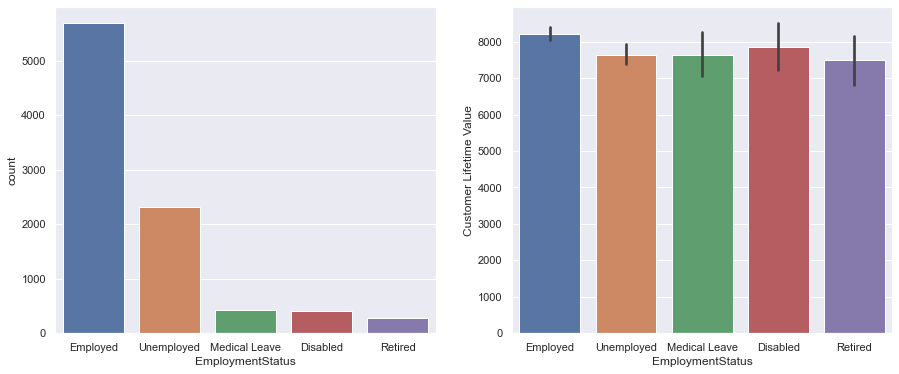

In [25]:
# EmploymentStatus
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(df['EmploymentStatus'])

plt.subplot(1, 2, 2)
sns.barplot(x='EmploymentStatus', y='Customer Lifetime Value', data=df)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Customer Lifetime Value'>

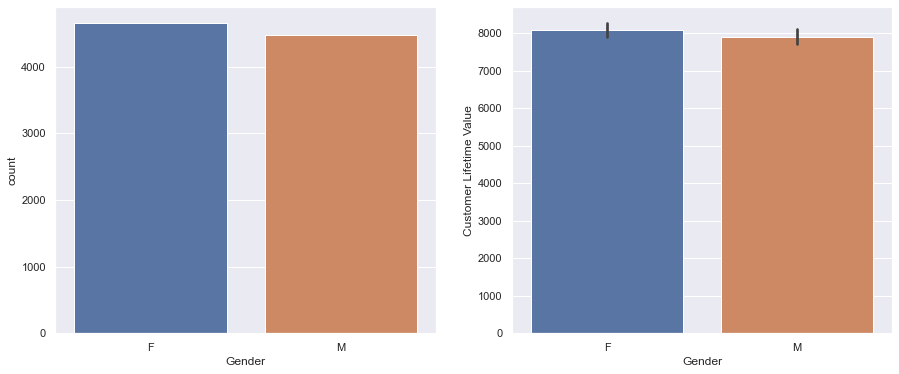

In [26]:
# Gender
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(df['Gender'])

plt.subplot(1, 2, 2)
sns.barplot(x='Gender', y='Customer Lifetime Value', data=df)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location Code', ylabel='Customer Lifetime Value'>

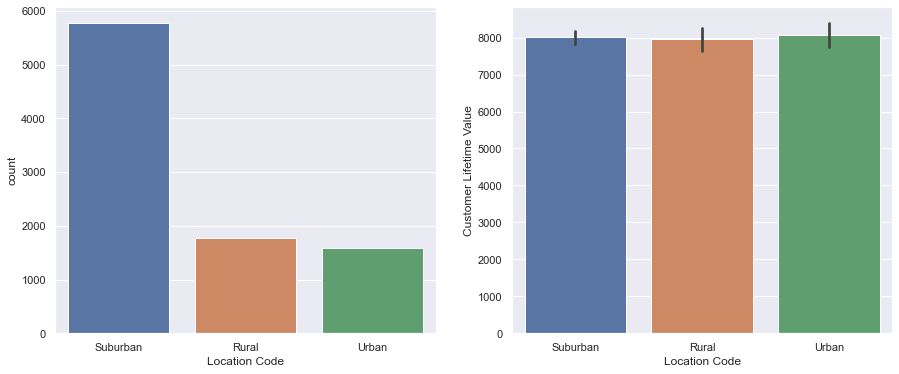

In [27]:
# Location Code
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(df['Location Code'])

plt.subplot(1, 2, 2)
sns.barplot(x='Location Code', y='Customer Lifetime Value', data=df)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital Status', ylabel='Customer Lifetime Value'>

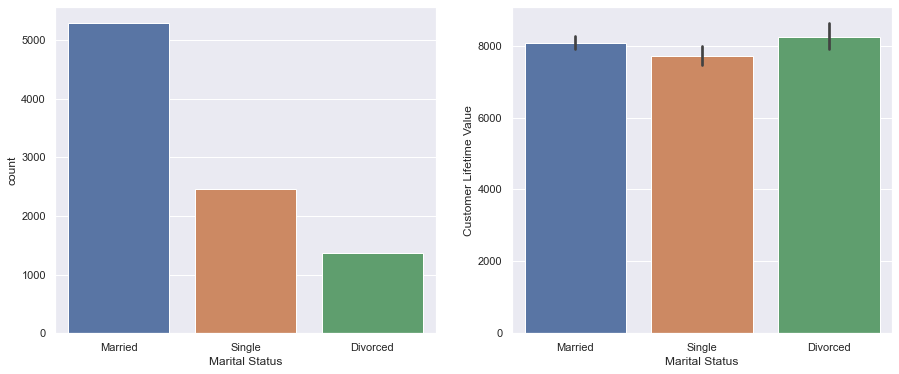

In [28]:
# Marital Status
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(df['Marital Status'])

plt.subplot(1, 2, 2)
sns.barplot(x='Marital Status', y='Customer Lifetime Value', data=df)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Policy Type', ylabel='Customer Lifetime Value'>

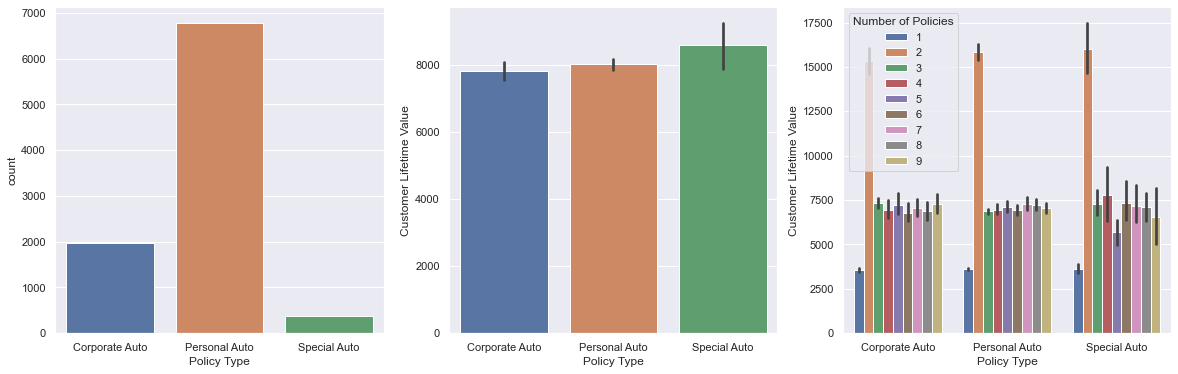

In [29]:
# Policy Type
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
sns.countplot(df['Policy Type'])

plt.subplot(1, 3, 2)
sns.barplot(x='Policy Type', y='Customer Lifetime Value', data=df)

plt.subplot(1, 3, 3)
sns.barplot(x='Policy Type', y='Customer Lifetime Value', hue= 'Number of Policies', data=df)

In [30]:
# Policy
df['Policy'] = df['Policy'].factorize()[0] # Convert categorical data into numerical data

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Policy', ylabel='Customer Lifetime Value'>

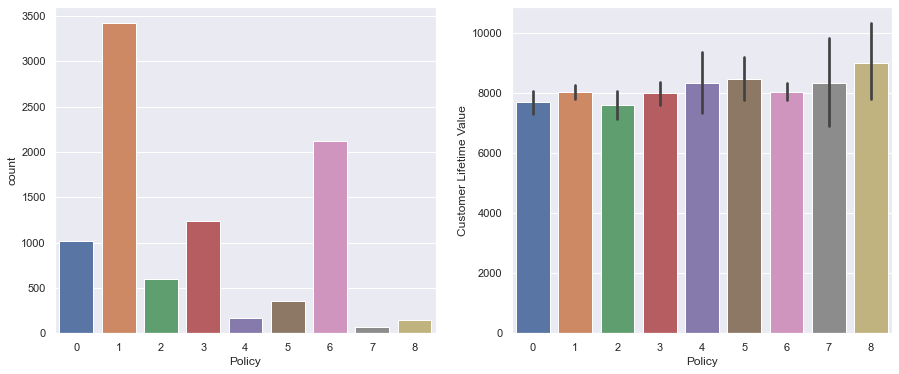

In [31]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(df['Policy'])

plt.subplot(1, 2, 2)
sns.barplot(x='Policy', y='Customer Lifetime Value', data=df)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales Channel', ylabel='Customer Lifetime Value'>

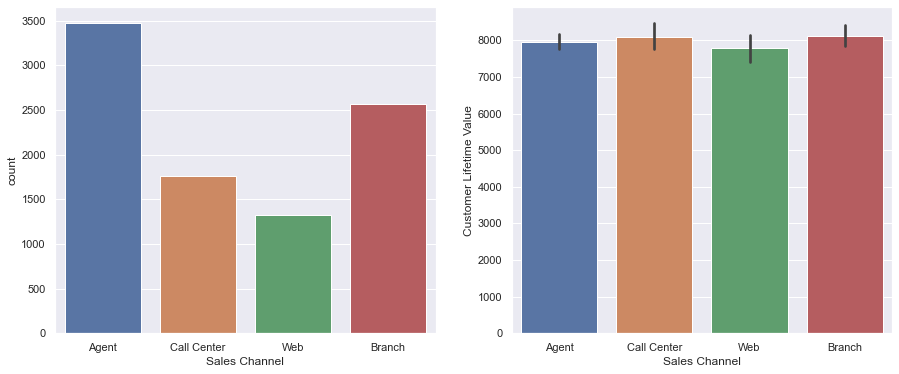

In [32]:
# Sales Channel
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(df['Sales Channel'])

plt.subplot(1, 2, 2)
sns.barplot(x='Sales Channel', y='Customer Lifetime Value', data=df)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Renew Offer Type', ylabel='Customer Lifetime Value'>

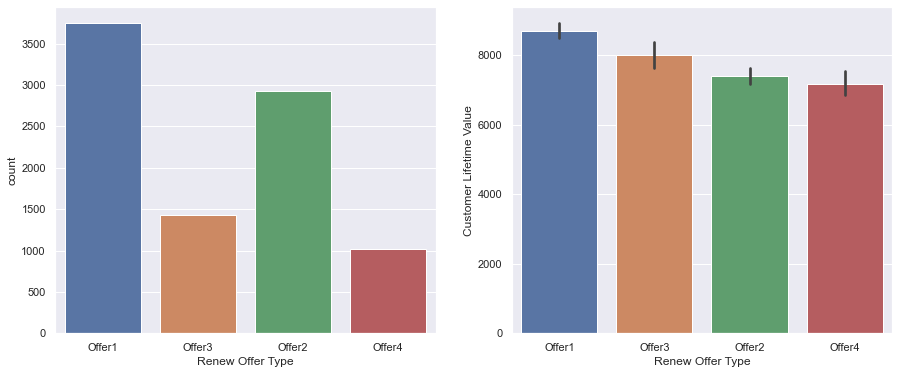

In [33]:
# Renew Offer Type
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(df['Renew Offer Type'])

plt.subplot(1, 2, 2)
sns.barplot(x='Renew Offer Type', y='Customer Lifetime Value', data=df)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle Class', ylabel='Customer Lifetime Value'>

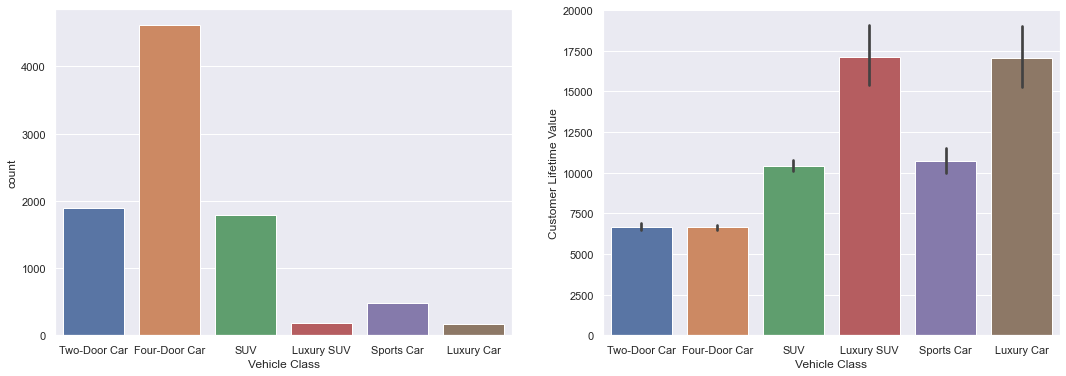

In [34]:
# Vehicle Class
plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
sns.countplot(df['Vehicle Class'])

plt.subplot(1, 2, 2)
sns.barplot(x='Vehicle Class', y='Customer Lifetime Value', data=df)

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle Size', ylabel='Customer Lifetime Value'>

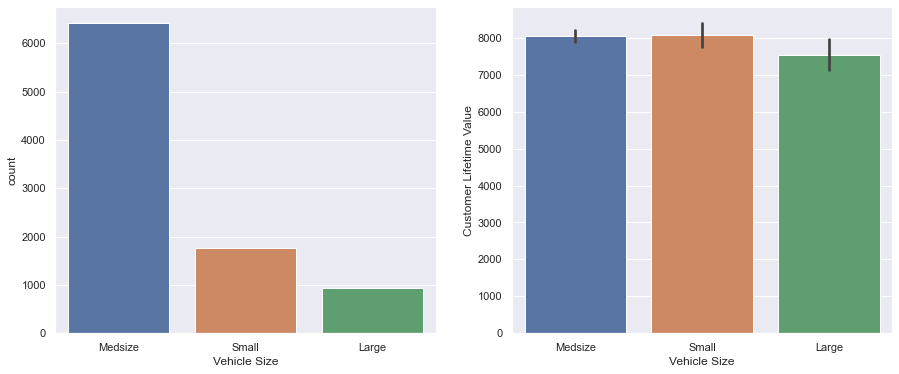

In [35]:
# Vehicle Size
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(df['Vehicle Size'])

plt.subplot(1, 2, 2)
sns.barplot(x='Vehicle Size', y='Customer Lifetime Value', data=df)

Most of categorical data have no meaningful relation with LTV - Customer, State, Response, Education, Effective To Date, EmploymentStatus, Gender, Location Code, Marital Status, Policy Type, Policy, Sales Channel, Vehicle Size.

For Coverage, LTV is high Premium > Extended Premium > Basic.

For Vehicle Class, luxury suv and luxury car have a relatively high LTV than other vehicle class.

# 3. Feature Engineering

Most of categorical data don't seem to have a positive relationswhip with LTV and continuous data such as Monthly Premium Auto, Total Claim Amount and Number of Policies have some correlation.

In [36]:
# drop insignificant columns
df = df.drop(['Income', 'Months Since Last Claim', 'Months Since Policy Inception','Number of Open Complaints','Customer','State','Response','Education','Effective To Date','EmploymentStatus','Gender','Location Code','Marital Status','Policy Type','Policy','Sales Channel','Vehicle Size'], axis=1)

In [37]:
df.head()

,Customer Lifetime Value,Coverage,Monthly Premium Auto,Number of Policies,Renew Offer Type,Total Claim Amount,Vehicle Class
0,2763.519279,Basic,69,1,Offer1,384.811147,Two-Door Car
1,6979.535903,Extended,94,8,Offer3,1131.464935,Four-Door Car
2,12887.431650,Premium,108,2,Offer1,566.472247,Two-Door Car
3,7645.861827,Basic,106,7,Offer1,529.881344,SUV
4,2813.692575,Basic,73,1,Offer1,138.130879,Four-Door Car


In [38]:
df['Coverage'] = df['Coverage'].factorize()[0] 

In [39]:
df['Renew Offer Type'] = 0
df.loc[(df['Renew Offer Type'] == 'Offer1'), 'Renew Offer Type'] = 0
df.loc[(df['Renew Offer Type'] == 'Offer2'), 'Renew Offer Type'] = 1
df.loc[(df['Renew Offer Type'] == 'Offer3'), 'Renew Offer Type'] = 2
df.loc[(df['Renew Offer Type'] == 'Offer4'), 'Renew Offer Type'] = 3

In [40]:
df['Vehicle Class'] = 0
df.loc[(df['Vehicle Class'] == 'Two-Door Car'), 'Vehicle Class'] = 0
df.loc[(df['Vehicle Class'] == 'Four-Door Car'), 'Vehicle Class'] = 1
df.loc[(df['Vehicle Class'] == 'SUV'), 'Vehicle Class'] = 2
df.loc[(df['Vehicle Class'] == 'Luxury SUV'), 'Vehicle Class'] = 3
df.loc[(df['Vehicle Class'] == 'Sports Car'), 'Vehicle Class'] = 4
df.loc[(df['Vehicle Class'] == 'Luxury Car'), 'Vehicle Class'] = 5

In [41]:
df.head()

,Customer Lifetime Value,Coverage,Monthly Premium Auto,Number of Policies,Renew Offer Type,Total Claim Amount,Vehicle Class
0,2763.519279,0,69,1,0,384.811147,0
1,6979.535903,1,94,8,0,1131.464935,0
2,12887.431650,2,108,2,0,566.472247,0
3,7645.861827,0,106,7,0,529.881344,0
4,2813.692575,0,73,1,0,138.130879,0


In [42]:
# prediction target
y = df['Customer Lifetime Value']

In [43]:
df_features = ['Coverage', 'Monthly Premium Auto', 'Number of Policies', 'Renew Offer Type', 'Total Claim Amount', 'Vehicle Class']

In [44]:
X = df[df_features]

In [45]:
X.head()

,Coverage,Monthly Premium Auto,Number of Policies,Renew Offer Type,Total Claim Amount,Vehicle Class
0,0,69,1,0,384.811147,0
1,1,94,8,0,1131.464935,0
2,2,108,2,0,566.472247,0
3,0,106,7,0,529.881344,0
4,0,73,1,0,138.130879,0


# 4. Modeling 

In [46]:
# machine learning algorithm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [47]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state = 0)

**1) DecisionTreeRegressor**

In [48]:
# Function for comparing different max_leaf_nodes
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

from sklearn.metrics import mean_absolute_error

candidate_max_leaf_nodes = [25, 50, 100, 250, 500, 1000]
for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 25  		 Mean Absolute Error:  1838
Max leaf nodes: 50  		 Mean Absolute Error:  1807
Max leaf nodes: 100  		 Mean Absolute Error:  1775
Max leaf nodes: 250  		 Mean Absolute Error:  1656
Max leaf nodes: 500  		 Mean Absolute Error:  1646
Max leaf nodes: 1000  		 Mean Absolute Error:  1566


**2) RandomForestRegressor**

In [49]:
# Function for comparing different n_estimators
def get_mae(n_estimators, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

from sklearn.metrics import mean_absolute_error

candidate_n_estimators = [25, 50, 100, 250, 500, 1000]
for n_estimators in candidate_n_estimators:
    my_mae = get_mae(n_estimators, train_X, val_X, train_y, val_y)
    print("n_estimators: %d  \t\t Mean Absolute Error:  %d" %(n_estimators, my_mae))

n_estimators: 25  		 Mean Absolute Error:  1536
n_estimators: 50  		 Mean Absolute Error:  1518
n_estimators: 100  		 Mean Absolute Error:  1522
n_estimators: 250  		 Mean Absolute Error:  1519
n_estimators: 500  		 Mean Absolute Error:  1519
n_estimators: 1000  		 Mean Absolute Error:  1521


**3) XGBRegressor**

In [50]:
# Function for comparing different n_estimators
def get_mae(n_estimators, train_X, val_X, train_y, val_y):
    model = XGBRegressor(n_estimators=n_estimators, learning_rate=0.05)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

candidate_n_estimators = [100, 250, 500, 1000]
for n_estimators in candidate_n_estimators:
    my_mae = get_mae(n_estimators, train_X, val_X, train_y, val_y)
    print("n_estimators: %d  \t\t Mean Absolute Error:  %d" %(n_estimators, my_mae))

n_estimators: 100  		 Mean Absolute Error:  1623
n_estimators: 250  		 Mean Absolute Error:  1681
n_estimators: 500  		 Mean Absolute Error:  1723
n_estimators: 1000  		 Mean Absolute Error:  1800


In [51]:
# Best model
best_model = RandomForestRegressor(n_estimators=50, random_state=0)
best_model.fit(train_X, train_y)
preds_val = best_model.predict(val_X)
mae = mean_absolute_error(val_y, preds_val)
print("Best Model is RandomForestRegressor with the lowest MAE %d." %mae)

Best Model is RandomForestRegressor with the lowest MAE 1518.


In [52]:
df_1 = pd.DataFrame({'Actual': val_y, 'Predicted': preds_val})
df_1

,Actual,Predicted
2182,5592.455266,5562.245561
7823,2317.282049,2366.551839
1651,9540.923395,9249.402259
888,8581.278701,9023.333509
3844,4229.923123,4485.549458
...,...,...
7464,8343.751519,9333.106935
3752,8828.933996,8785.040017
593,4016.541995,3914.955559
226,5159.369746,5548.721883


# 5. Conclusion

To predict customer LTVs of an auto insurance company, 23 independant variables were analyzed and six relevant variables were selected as feature items. 3 regression models were applied and MAE(Mean Absolute Error) was the lowest when RandomRegressor with n_estimators=50 is applied.

Customer LTV(dependent variable) itself has many outliers that are out of the Upper fence(Q3 + 1.5 * IQR), which seems to widen the errors between Actual and Predicted. Not only is it possible to apply different feature items or different algorithms, but how to deal with these outliers could be a way to improve accuracy.